<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems </font></center></h2>    
<h2><center> <font color='black'> Due date : 05 April 23:59 </font></center></h2>    

<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

# Homework instructions 

- Insert your team member names and student IDs in the field "Team mates" below. If you are not working in a team please insert only your name, surname and student ID 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close at 12:00 am, so please make sure you have enough time to submit the homework. 

- Only one of the teammates should submit the homework. We will grade and give points to both of you! 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 


**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name Surname: Enlik -</font>&emsp;   <font color='red'>Student ID: B96323</font>


<font color='red'>Name Surname: XXXXX</font>&emsp;   <font color='red'>Student ID: YYYY</font>


# 1. Classification tasks and algorithms (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to causes like retirement, resignation, elimination of a position, personal health etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [1]:
# !conda install matplotlib

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,80,6,3,3,2,2,2,2


In [4]:
### Data Exploration

## equivalent to dplyr.glimpse() function in R language
# hr_data.info()

## Numerical features overview
# hr_data.describe()

## Plot data distribution
# hr_data.hist(figsize=(20,20))
# plt.show()

## Check EducationField Distribution
# hr_data.EducationField.value_counts()

## Check Gender Distribution
# hr_data.Gender.value_counts()

## Check Attrition Distribution
# hr_data.Attrition.value_counts()
# print('Percentage ex-employees is {:.2f}% and current employees is {:.2f}%'.format(
#     hr_data[hr_data['Attrition'] == 'Yes'].shape[0] / hr_data.shape[0]*100,
#     hr_data[hr_data['Attrition'] == 'No'].shape[0] / hr_data.shape[0]*100))

## 1.1 Dataset exploration (1.6 points)

**1.1.0.
Plot the correlation of the variables in the dataset with the Attrition variable. (0.4 points)**

In [5]:
hr_data.Attrition.dtypes

dtype('O')

In [6]:
# Pre-processing before get the correlation value
hr_data.Attrition.replace(to_replace='Yes', value = 1, inplace = True)
hr_data.Attrition.replace(to_replace='No', value = 0, inplace = True)
hr_data.isnull().sum()

hr_data_dummies = pd.get_dummies(hr_data)
hr_data_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,92,2,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,40,3,2,3468,...,0,0,0,0,0,1,0,1,1,0


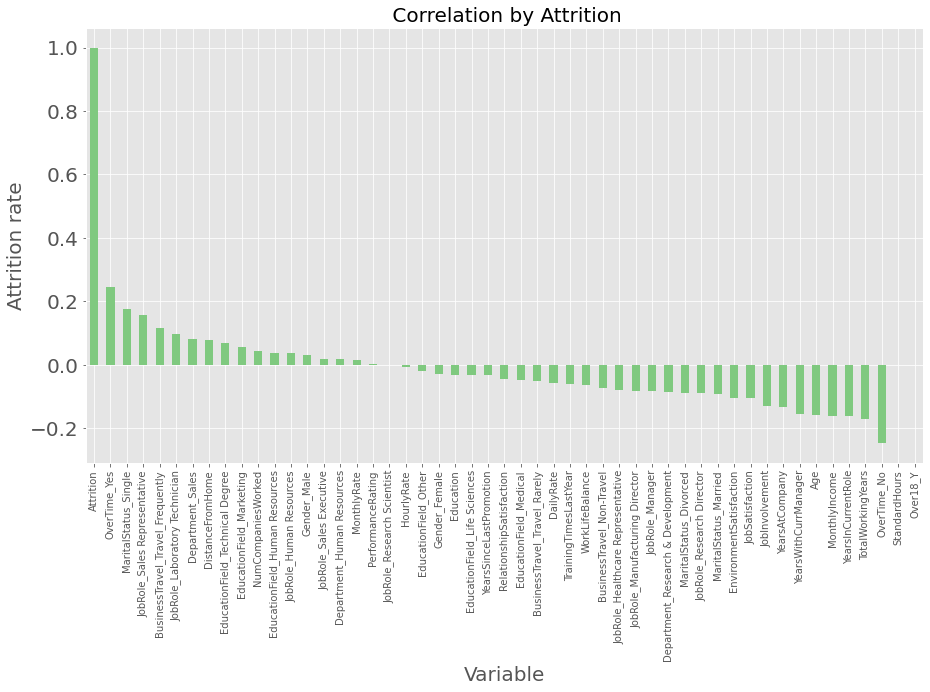

Most Positive Correlations: 
 Attrition                           1.000000
OverTime_Yes                        0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
Name: Attrition, dtype: float64

Most Negative Correlations: 
 YearsInCurrentRole   -0.160545
TotalWorkingYears    -0.171063
OverTime_No          -0.246118
StandardHours              NaN
Over18_Y                   NaN
Name: Attrition, dtype: float64


In [7]:
import matplotlib.cm as cm
# from sklearn.preprocessing import normalize

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
#df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.style.use('ggplot')

# https://stackoverflow.com/questions/47302343/what-names-can-be-used-in-plt-cm-get-cmap
# Get a color map
my_cmap = cm.get_cmap('Accent')

correlations = hr_data_dummies.corr()['Attrition'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title(' Correlation by Attrition',fontsize=20)
plt.xlabel('Variable', fontsize=20)
plt.ylabel('Attrition rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

**1.1.1. Write three interesting observation that you notice. Were they as you  expected ? Please elaborate your answer in 1 - 3 sentences. (0.4 points)**

**<font color='red'>Answer 1:</font>** When employee working over time, it's most likely they will leave the company because of the most high correlation with `Attrition`

**<font color='red'>Answer 2:</font>** Female employees are less likely to leave the company compare to male employees

**<font color='red'>Answer 3:</font>** All the employees are older than 18 years old and have same standard working hours. So, we can drop these two variables for our model, `StandardHours` and `Over18` because there is no correlation (`NaN` value) at all with `Attrition`

**1.1.2 Make a boxplot for total working years for each type of Attrition values. (0.4 points)**

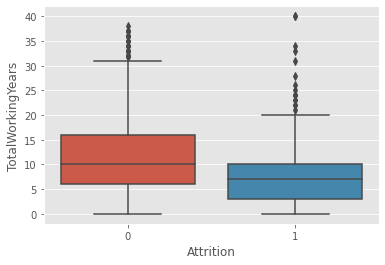

In [8]:
import seaborn as sns

sns.boxplot(x = hr_data.Attrition, y = hr_data.TotalWorkingYears)

- 0 = No
- 1 = Yes 

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.4 points)**

In [9]:
hr_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [10]:
# !pip install cufflinks

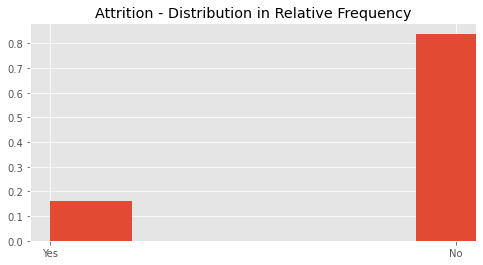

In [11]:
hr_data.Attrition.replace(to_replace=1, value = 'Yes', inplace = True)
hr_data.Attrition.replace(to_replace=0, value = 'No', inplace = True)

fig = plt.figure(figsize=[8,4])

ax = plt.subplot()
ax.hist(hr_data['Attrition'], 
         width = 0.2,
         weights = np.ones(len(hr_data['Attrition'])) / len(hr_data['Attrition']) 
        )
ax.set_title('Attrition - Distribution in Relative Frequency')
# ax.x
plt.show()

## Using Plotly 
# # Standard plotly imports
# import plotly as py
# import plotly.figure_factory as ff
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# # Using plotly + cufflinks in offline mode
# import cufflinks as cf
# cf.set_config_file(offline=True)
# import cufflinks
# cufflinks.go_offline(connected=True)

# hr_data['Attrition'].iplot(kind='hist', 
#                            title='Attrition - Distribution in Relative Frequency',
#                            xTitle='Attrition',
#                            yTitle='Frequency')

## 1.2 Classification  (6.4 points)

We are going to predict the variable Attrition by trying different classification algorithms and comparing them. Before let's split the data into training and test set. Hint: You can apply some preprocessing as well to get better results.

In [12]:
# pre-processing
# remove StandardHours and Over18_Y because there is no correlation with Attrition
hr_data_dummies = hr_data_dummies.drop(['StandardHours', 'Over18_Y'], axis =1)
hr_data_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [13]:
hr_data_dummies.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       

In [14]:
# Import Library
from sklearn.model_selection import train_test_split # for data splitting

In [15]:

X = hr_data_dummies.drop(columns = ['Attrition'])
y = hr_data_dummies.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**1.2.1 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [16]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

modelDT = DT()
modelDT = modelDT.fit(X_train, y_train)
preds_DT = modelDT.predict(X_test)
print('Accuracy of DecisionTreeClassifier on test set: ', metrics.accuracy_score(y_test, preds_DT))

Accuracy of DecisionTreeClassifier on test set:  0.7755102040816326


**1.2.2 Plot the confusion matrix for the predicted values. Based on this matrix or your general knowledge, why accuracy is not a good metric to use in this case ? (0.4 points)**

In [17]:
confusion_matrix_DT = metrics.confusion_matrix(y_test, preds_DT)
print("\n Confusion Matrix")
print(confusion_matrix_DT)


 Confusion Matrix
[[214  31]
 [ 35  14]]


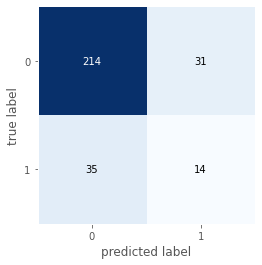

In [18]:
from mlxtend.plotting import plot_confusion_matrix
confusion_matrix_DT = metrics.confusion_matrix(y_test, preds_DT)

binary = confusion_matrix_DT

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()

In [19]:
metrics.precision_score(y_test, preds_DT)

0.3111111111111111

In [20]:
metrics.recall_score(y_test, preds_DT)

0.2857142857142857

`Accuracy` is not a good metric for this case, because the dataset `HR_Employee_Attrition.csv` has unbalanced class, especially in our target variable `Attrition`. The frequency of `Attrition = No` is much bigger than frequency of `Attrition = Yes`, with 83.88% compare to 16.12%

In [21]:
print('Percentage of [Attrition = No] is {:.2f}% and [Attritrion = Yes] is {:.2f}%'.format(
    hr_data[hr_data['Attrition'] == 0].shape[0] / hr_data.shape[0]*100,
    hr_data[hr_data['Attrition'] == 1].shape[0] / hr_data.shape[0]*100))

Percentage of [Attrition = No] is 0.00% and [Attritrion = Yes] is 0.00%


**1.2.3 We want to use a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like ? (0.4 points)**

In [22]:
## TODO Check it later

from sklearn.dummy import DummyClassifier as DC

modelDC = DC()
modelDC.fit(X_train, y_train)
preds_DC = modelDC.predict(X_test)

print('Accuracy of DecisionTreeClassifier on test set: ', metrics.accuracy_score(y_test, preds_DC))


Accuracy of DecisionTreeClassifier on test set:  0.7414965986394558


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**<font color='red'>Answer 1:</font>** 

**1.2.4 It is possible to plot the decision tree by using different plotting libraries. We are using the https://pypi.org/project/graphviz/ and sklearn.tree. Install the package and complete the code below so you will get a visualisation of our decision tree. (0.4 points)**

In [23]:
# !pip install graphviz
# !conda install graphviz

# install graphviz on macOs
# https://graphviz.gitlab.io/download/


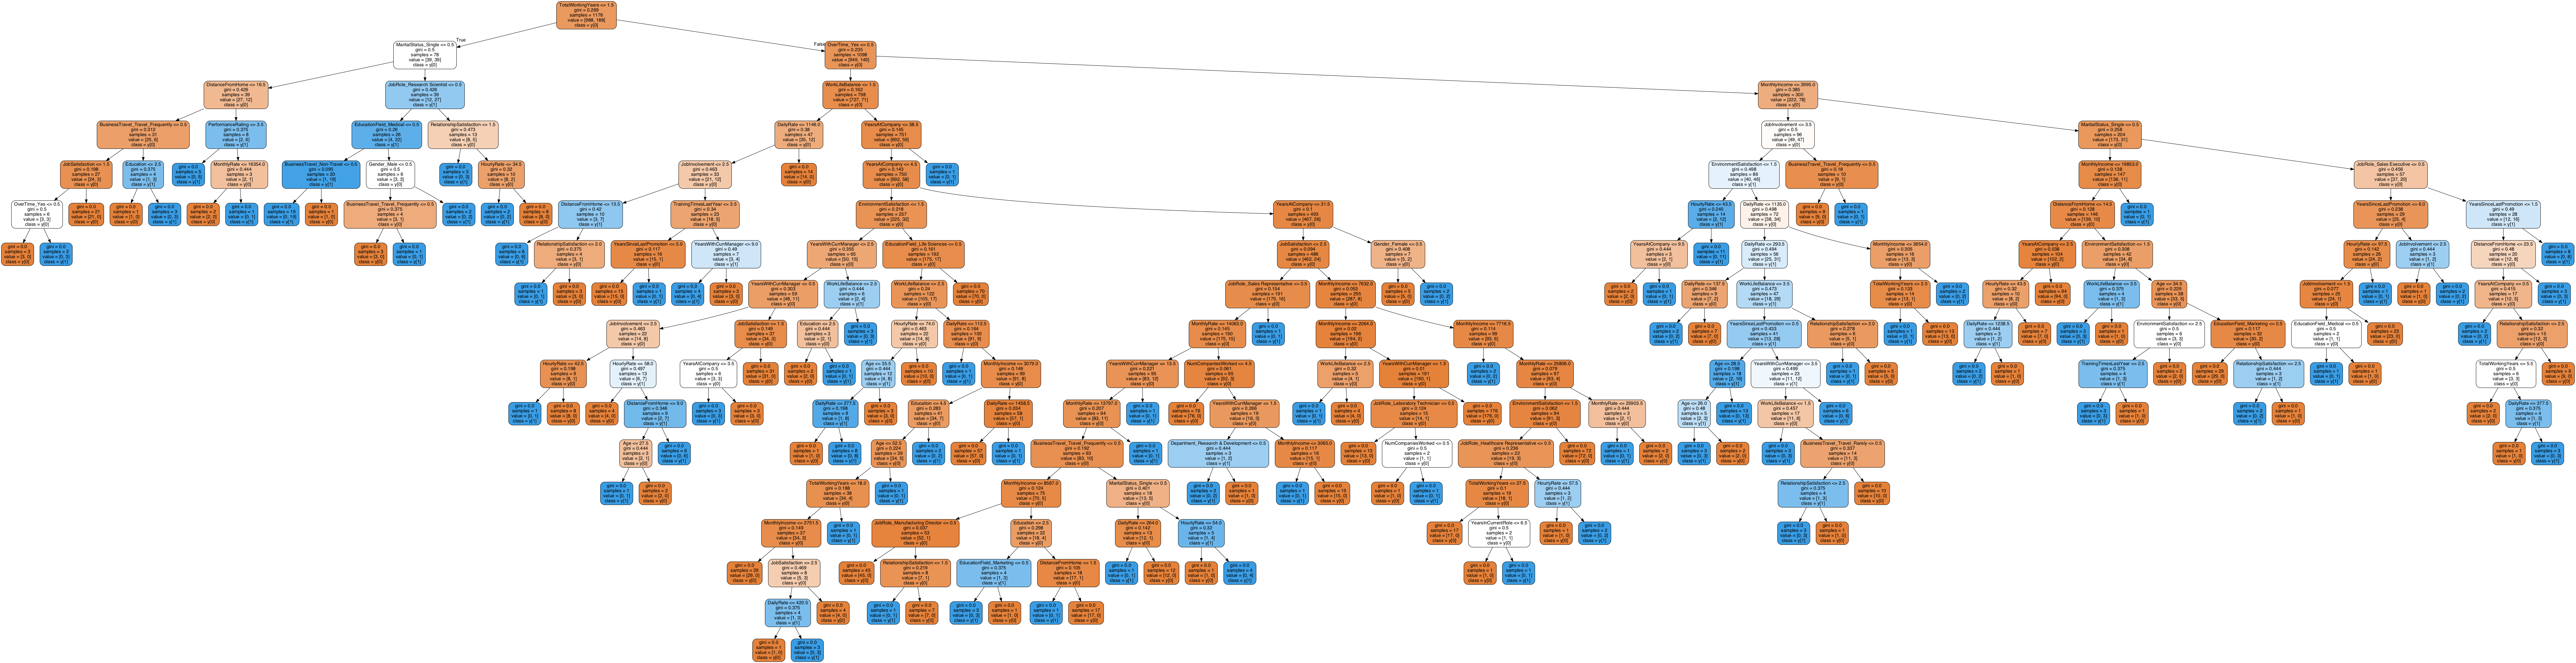

In [24]:
from sklearn.tree import export_graphviz
import graphviz
from os import system

# feature_names = list(X.columns)

dot_prod = export_graphviz(modelDT, out_file='decisionTree.dot', feature_names=list(X.columns),
                class_names=True, filled=True, rounded=True,
                special_characters=False)
graph = graphviz.Source(dot_prod)
# graph

# Reference
# https://gist.github.com/WillKoehrsen/ff77f5f308362819805a3defd9495ffd

# Convert to png using system command (requires Graphviz)
system("dot -Tpng decisionTree.dot -o decisionTree.png")

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'decisionTree.png')

In [25]:
# Optimizing Decision Tree Performance
# Reference: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

# Create Decision Tree classifer object
modelDT_optimized = DT(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
modelDT_optimized = modelDT_optimized.fit(X_train,y_train)

#Predict the response for test dataset
preds_DT_optimized = modelDT_optimized.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds_DT_optimized))

Accuracy: 0.8469387755102041


The classification rate increased to 84.7%, which is better accuracy than the previous model (75%)

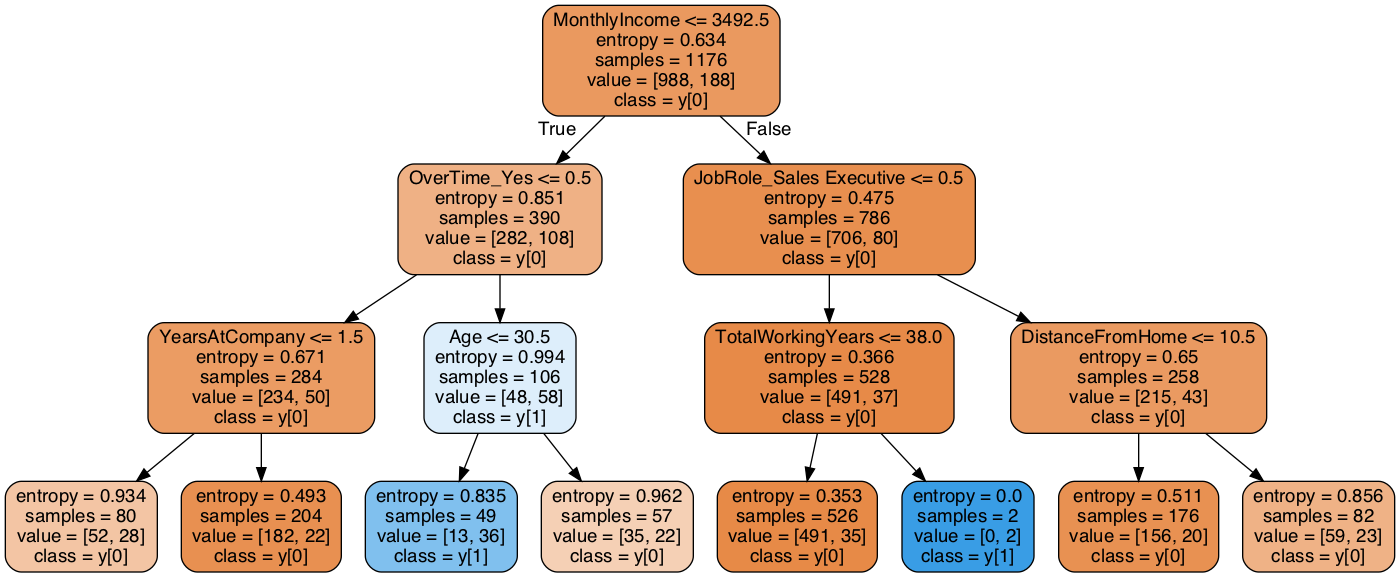

In [26]:
dot_prod_optimized = export_graphviz(modelDT_optimized, out_file='decisionTree_optimized.dot', feature_names=list(X.columns),
                class_names=True, filled=True, rounded=True,
                special_characters=False)
graph = graphviz.Source(dot_prod_optimized)
# Convert to png using system command (requires Graphviz)
system("dot -Tpng decisionTree_optimized.dot -o decisionTree_optimized.png")

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'decisionTree_optimized.png')

This optimized model (using pruning method) is less complex, more explainable, and easier to understand

**1.2.5 For the decision tree we modeled, what is the most important factor to decide if an employee is going to 
leave or not? (0.4 points)**

In [27]:
# Reference about Feature Importances
# https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

# Non-Optimized DT Model
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(modelDT.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head()

,feature,importance
8,MonthlyIncome,0.093
13,TotalWorkingYears,0.080
1,DailyRate,0.073
5,HourlyRate,0.069
47,OverTime_Yes,0.050


In [28]:
# Optimized DT Model
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(modelDT_optimized.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head()

,feature,importance
8,MonthlyIncome,0.315
47,OverTime_Yes,0.280
16,YearsAtCompany,0.119
41,JobRole_Sales Executive,0.093
0,Age,0.074


**<font color='red'>Answer 1:</font>** MonthlyIncome

**1.2.6 Plot the classification report for the decision tree. In this case study which one out of  precision and recall, would you consider more important ? Please elaborate your answer. (0.4 points)**

**<font color='red'>Answer 1:</font>** 

Precision, because:

- //merge with Nga's work

TODO
- In certain circumstances, it’s better to have a high precision. For example, a diagnosis might be better off with a few false positives rather than let anyone with the actual disease slip through the cracks and avoid getting treated.
- Other times, it’s better to have a higher recall as is the case in spam filters. It’s more acceptable to have a few spam emails in the user’s inbox than it is to classify important emails as junk.


Average precision-recall score: 0.21


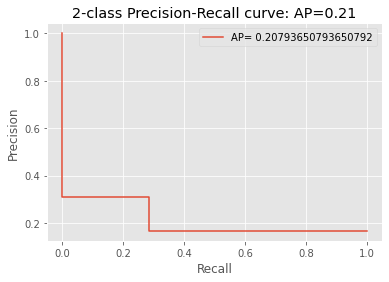

In [29]:
# print("- Precision: \t {0:.2f}".format(metrics.precision_score(y_test, preds_DT_optimized)))
# print("- Recall: \t {0:.2f}".format(metrics.recall_score(y_test, preds_DT_optimized)))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# average_precision = average_precision_score(y_test, preds_DT_optimized)
average_precision = average_precision_score(y_test, preds_DT)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# disp = plot_precision_recall_curve(modelDT_optimized, X_test, y_test,label="AP= "+str(average_precision))
disp = plot_precision_recall_curve(modelDT, X_test, y_test,label="AP= "+str(average_precision))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.legend()

**1.2.7 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the effect happening ? (0.4 points)**

In [30]:
from sklearn.metrics import f1_score

# From Lab 06
# print(f"F1_score macro: {f1_score(y_test, preds_DT_optimized, average='macro')}")
# print(f"\nF1_score micro: {f1_score(y_test, preds_DT_optimized, average='micro')}")
# print(f"\nF1_score weighted: {f1_score(y_test, preds_DT_optimized, average='weighted')}")

# print(f"\nF1_score test data: {f1_score(y_test, preds_DT_optimized)}")


# F1-score for training data
pred_DT_train = modelDT.predict(X_train)
print(f"\nF1_score on train data: {f1_score(y_train, pred_DT_train)}")

# F1-score for test data
# print(f"F1_score macro: {f1_score(y_test, preds_DT, average='macro')}")
# print(f"\nF1_score micro: {f1_score(y_test, preds_DT, average='micro')}")
# print(f"\nF1_score weighted: {f1_score(y_test, preds_DT, average='weighted')}")

print(f"\nF1_score on test data: {f1_score(y_test, preds_DT)}")


F1_score on train data: 1.0

F1_score on test data: 0.29787234042553196


**<font color='red'>Answer 1:</font>** 

**1.2.8 We can use cross validation scores to ensure that our model is generalizing well and we can be more confident when we apply it in test data. We will now try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.4 points)**

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
best_score = 0
best_depth = 0
for i in range(5,20):
#     clf = DT(max_depth=i, random_seed = 0)
    clf = DT(max_depth=i, random_state = 0)
    # Perform 5-fold cross validation. 
    # The number of folds you want to use generally depends from the size of data
    scores = cross_val_score(estimator= clf, scoring="f1", X=X, y=y, cv=5)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_depth = i

    print('Mean score ', mean_score)

print('\n The best tree depth is: ', best_depth )

Mean score  0.34492165610020037
Mean score  0.37368237188722164
Mean score  0.3795585465126109
Mean score  0.35860890527509925
Mean score  0.3713641682963801
Mean score  0.36311875365619384
Mean score  0.3550931750890437
Mean score  0.37163221680446606
Mean score  0.37582894709659054
Mean score  0.3643644043969586
Mean score  0.34748921416593187
Mean score  0.3500625480504707
Mean score  0.35472079538780943
Mean score  0.35059891329271825
Mean score  0.35059891329271825

 The best tree depth is:  7


**1.2.9 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [33]:
# Data Pre-processing for SVM and Logistic Regression Model
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = X.columns.values

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)

X_scaled = pd.DataFrame(scaler.transform(X))

X_scaled.columns = features

# Create Train & Test Data for Logistic Regression
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

In [34]:
# y_scaled_train.unique()
# y_scaled_test.unique()
# X_scaled_train.Age.describe()
# X_scaled_test.Age.describe()

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model_svm = SVC(random_state=0)
# model_svm = model_svm.fit(X_train, y_train)
# preds_svm = model_svm.predict(X_test)

# print('SVM model Accuracy = ', metrics.accuracy_score(y_test, preds_svm))
# print('SVM model Recall = ', metrics.recall_score(y_test, preds_svm))
# print('SVM model Precision = ', metrics.precision_score(y_test, preds_svm))
# print('SVM model F1 Score = ', metrics.f1_score(y_test, preds_svm))
# print('SVM model AUC = ', metrics.roc_auc_score(y_test, preds_svm))

# print('SVM model Confusion Matrix \n', metrics.confusion_matrix(y_test, preds_svm))

model_svm = model_svm.fit(X_scaled_train, y_scaled_train)
preds_svm = model_svm.predict(X_scaled_test)

print('SVM model Accuracy = {:.2f}'.format(metrics.accuracy_score(y_scaled_test, preds_svm)))
print('SVM model Recall = {:.2f}'.format(metrics.recall_score(y_scaled_test, preds_svm)))
print('SVM model Precision = {:.2f}'.format(metrics.precision_score(y_scaled_test, preds_svm)))
print('SVM model F1 Score = {:.2f}'.format(metrics.f1_score(y_scaled_test, preds_svm)))
print('SVM model AUC = {:.2f}'.format(metrics.roc_auc_score(y_scaled_test, preds_svm)))

print('SVM model Confusion Matrix \n', metrics.confusion_matrix(y_scaled_test, preds_svm))


# fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_svm, pos_label = 2)
# metrics.auc(fpr, tpr)


SVM model Accuracy = 0.87
SVM model Recall = 0.21
SVM model Precision = 0.88
SVM model F1 Score = 0.34
SVM model AUC = 0.60
SVM model Confusion Matrix 
 [[369   2]
 [ 55  15]]


**1.2.10 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [36]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression as LR
model_LR = LR(random_state=0)
# model_LR = model_LR.fit(X_train, y_train)
# pred_LR = model_LR.predict(X_test)

# print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
# print('Recall of Logistic Regression classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_LR)))
# print('Precision of Logistic Regression classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_LR)))
# print('F1-Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_LR)))
# print('AUC Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_LR)))
# print('Logistic Regression Confusion Matrix = \n', metrics.confusion_matrix(y_test, pred_LR))

model_LR = model_LR.fit(X_scaled_train, y_scaled_train)
pred_LR = model_LR.predict(X_scaled_test)

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_scaled_test, pred_LR)))
print('Recall of Logistic Regression classifier on test set: {:.2f}'.format(metrics.recall_score(y_scaled_test, pred_LR)))
print('Precision of Logistic Regression classifier on test set: {:.2f}'.format(metrics.precision_score(y_scaled_test, pred_LR)))
print('F1-Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.f1_score(y_scaled_test, pred_LR)))
print('AUC Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_scaled_test, pred_LR)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_scaled_test, pred_LR))

Accuracy of Logistic Regression classifier on test set: 0.88
Recall of Logistic Regression classifier on test set: 0.37
Precision of Logistic Regression classifier on test set: 0.74
F1-Score of Logistic Regression classifier on test set: 0.50
AUC Score of Logistic Regression classifier on test set: 0.67
Logistic Regression Confusion Matrix 
 [[362   9]
 [ 44  26]]


**1.2.11 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.4 points)**


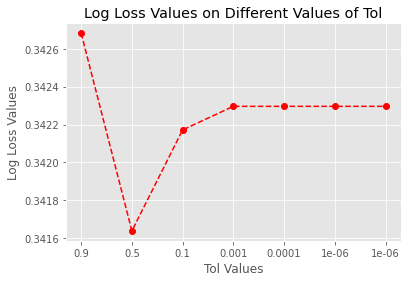

In [37]:
from sklearn.linear_model import LogisticRegression as LR

log_loss = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    lr = LR(tol = tol, random_state = 0 )

    lr.fit(X_scaled_train, y_scaled_train)
    probs = lr.predict_proba(X_scaled_test)
#     probs = probs[:,1]
    
    log_loss.append(metrics.log_loss(y_scaled_test, probs))

# print(log_loss)

# Plot Reference
# https://stackoverflow.com/questions/44813601/how-to-set-x-axis-values-in-matplotlib-python
tol_values = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
x_axis = list(range(len(tol_values)))

plt.plot(x_axis, log_loss, marker='o', linestyle='--', color='r') 
plt.xlabel('Tol Values')
plt.ylabel('Log Loss Values') 
plt.xticks(x_axis, tol_values)
plt.title('Log Loss Values on Different Values of Tol')
plt.show()

**<font color='red'>Answer 1:</font>** `0.5` is the best tol values with the lowest log loss score.

Some theory explanation about Log Loss:
- The goal of our machine learning models is to minimize this value
- A perfect model would have a log loss of 0

**1.2.12 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

In [38]:
from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_rf)))
print('Recall of Random Forest classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_rf)))
print('Precision of Random Forest classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_rf)))
print('F1-Score of Random Forest classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_rf)))
print('AUC Score of Random Forest classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_rf)))
print('Random Forest - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_rf))


Accuracy of Random Forest classifier on test set: 0.86
Recall of Random Forest classifier on test set: 0.18
Precision of Random Forest classifier on test set: 0.90
F1-Score of Random Forest classifier on test set: 0.31
AUC Score of Random Forest classifier on test set: 0.59
Random Forest - Confusion Matrix 
 [[244   1]
 [ 40   9]]


**1.2.13 Get the probabilities for each class from Random Forest model. Threshold the probabilities such that it will output the class No  only if the model is 70% or higher confident. In all other cases it will predict the class Yes. (0.4 points)**


In [39]:
# pred_rf_proba [:,0]
# pred_rf_proba

In [40]:
# Reference:
# https://stackoverflow.com/questions/49785904/how-to-set-threshold-to-scikit-learn-random-forest-model

threshold = 0.7 #set threshold 70%

pred_rf_proba = model_rf.predict_proba(X_test)
pred_rf_proba_th = (pred_rf_proba [:,1] >= threshold).astype('int')

# print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_rf_proba_th)))

**1.2.14 Build again the classification matrix. Do you think there were some improvements regarding the classification for class Yes ? Explain your answer briefly. (0.4 points)**

In [41]:
print('Random Forest with Threshold - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_rf_proba_th))

Random Forest with Threshold - Confusion Matrix 
 [[245   0]
 [ 48   1]]


**<font color='red'>Answer 1:</font>** Yes, it is

- We set the decision threshold of the model to maximize either Recall or Specifity
- The default threshold for RandomForestClassifier is 0.5, so use that as a starting point

[TowardsDataScience](https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65)

**1.2.15 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.4 points)**

In [42]:
from xgboost import XGBClassifier

# get an instance from the clf
model_XGB = XGBClassifier()

# fit data
model_XGB.fit(X_train, y_train)

# predict unseen data
pred_XGB = model_XGB.predict(X_test)

print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_rf)))
print('Recall of XGBoost classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_rf)))
print('Precision of XGBoost classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_rf)))
print('F1-Score of XGBoost classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_rf)))
print('AUC Score of XGBoost classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_rf)))
print('XGBoost - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_rf))

Accuracy of XGBoost classifier on test set: 0.86
Recall of XGBoost classifier on test set: 0.18
Precision of XGBoost classifier on test set: 0.90
F1-Score of XGBoost classifier on test set: 0.31
AUC Score of XGBoost classifier on test set: 0.59
XGBoost - Confusion Matrix 
 [[244   1]
 [ 40   9]]


**1.2.16 Based on your answer from 1.2.6 and other important evaluation metrics for unbalanced datasets, choose the best classifier and plot its feature importances in decreasing order. Were the 3 most important features as you expected ? Please explain why. (0.4 points)**

**<font color='red'>Answer 1:</font>** //TODO

In [43]:
# 3 most important features
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model_rf_scaled.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

NameError: name 'model_rf_scaled' is not defined

# 2. Improving classification (2 points)

In this task we will try to improve the performance of the best classifier you selected on 1.2.12 by using several techniques. 

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer 1:</font>**

//TODO - need to paraphrase and clarify the statement
Oversampling, because:

- Because this unbalanced dataset has less data for minority class (`Attrition = Yes`)
- With oversampling, it can duplicate some examples from the minority class in the training dataset and can result in overfitting for some models.

[machinelearningmastery.com](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.4 points)**

In [ ]:
# Classes count
count_class_0, count_class_1 = hr_data_dummies.Attrition.value_counts()

# Divide by class
df_class_0 = hr_data_dummies[hr_data_dummies['Attrition'] == 0]
df_class_1 = hr_data_dummies[hr_data_dummies['Attrition'] == 1]


In [ ]:
# from Rectangle import Rectangle
colors = [ '#66CDAA',  '#6495ED']

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Attrition.value_counts())

df_test_over.Attrition.value_counts().plot(kind='bar', title='Count (target)', color=colors);

**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [ ]:
X = df_test_over.drop(columns = ['Attrition'])
y = df_test_over.Attrition

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_rf)))
print('Recall of Random Forest classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_rf)))
print('Precision of Random Forest classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_rf)))
print('F1-Score of Random Forest classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_rf)))
print('AUC Score of Random Forest classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_rf)))
print('Random Forest - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_rf))


**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.4 points)**

In [ ]:
colors = [ '#66CDAA',  '#6495ED']

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Attrition.value_counts())

df_test_under.Attrition.value_counts().plot(kind='bar', title='Count (target)',color=colors);

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.4 points)** 

In [ ]:
X = df_test_under.drop(columns = ['Attrition'])
y = df_test_under.Attrition

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_rf)))
print('Recall of Random Forest classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_rf)))
print('Precision of Random Forest classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_rf)))
print('F1-Score of Random Forest classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_rf)))
print('AUC Score of Random Forest classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_rf)))
print('Random Forest - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_rf))


## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>

**<font color='red'>(please change X in the next cell into your estimate)</font>**

X hours

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>